The project has been developed for course CSE 572 Homework 2 and only concentrated into two main models Decision Tree and Random Forest.
Developed by Zhandaulet Yespossynov ASU ID 1233282975 zyesposs@asu.edu

In [364]:
# for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# will be used for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning algorithms
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# for preprocessing and model evaluation
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# will be used to ignore warnings
import warnings


For HW1 I have used train and test data from Kaggle Titanic and working on HW2 I found that test data does not have 'Survived' column. 
So, I found from Kaggle another full datatest for 1309 rows and used it. I got it from here https://www.kaggle.com/datasets/vinicius150987/titanic3
This is benefial for evaluating testing. I have completely reproduced whole EDA and FE part and even improved data with null replacements.

In [365]:
# ignore warnings
warnings.filterwarnings("ignore")

# reading data from xls file
xls_df = pd.read_excel("data/titanic3.xls") 

# Features description in xls_df(extracted from the xls file):
# survival – Survival status (0 = No, 1 = Yes)
# class – Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
# name – Passengers full name
# sex – Passengers gender
# age – Passengers age
# sibsp – Number of siblings or spouses aboard
# parch – Number of parents or children aboard
# ticket – Ticket number
# fare – Fare paid by the passenger
# cabin – Cabin number or identifier
# embarked – Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# boat – Lifeboat number (recorded only if the passenger survived)
# body – Body number (recorded if the passenger did not survive and the body was recovered)
# home.dest – Passengers home/destination

In [366]:
# make a copy with consistent column names
xls_df = xls_df.rename(columns={
    'pclass': 'Pclass',
    'survived': 'Survived',
    'name': 'Name',
    'sex': 'Sex',
    'age': 'Age',
    'sibsp': 'SibSp',
    'parch': 'Parch',
    'ticket': 'Ticket',
    'fare': 'Fare',
    'cabin': 'Cabin',
    'embarked': 'Embarked',
    'boat': 'Boat',
    'body': 'Body',	
    'home.dest': 'Home_dest',
})


In [367]:
# review the data
xls_df.head(10)

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [368]:
# metata information about the dataset
xls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Survived   1309 non-null   int64  
 2   Name       1309 non-null   object 
 3   Sex        1309 non-null   object 
 4   Age        1046 non-null   float64
 5   SibSp      1309 non-null   int64  
 6   Parch      1309 non-null   int64  
 7   Ticket     1309 non-null   object 
 8   Fare       1308 non-null   float64
 9   Cabin      295 non-null    object 
 10  Embarked   1307 non-null   object 
 11  Boat       486 non-null    object 
 12  Body       121 non-null    float64
 13  Home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [369]:
# description of numerical features
xls_df.describe()

,Pclass,Survived,Age,SibSp,Parch,Fare,Body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Quick summary of numeric features:
1. Pclass – passenger class with values 1 to 3 and mean 2.29 most passengers were in 3rd class this feature is strongly linked with survival since higher classes had better conditions
2. Survived – target variable about 38 percent of passengers survived it represents the outcome the model will try to predict
3. Age – 20 percent of values are missing mean age is 30 and 75 percent of passengers were younger than 39 missing values should be filled before modeling it is an important survival factor
4. SibSp – number of siblings or spouses aboard fully filled median is 0 and 75 percent less or equal to 1 most passengers traveled alone or with one family member useful for family 5. related insights
5. Parch – number of parents or children aboard mean 0.38 and median 0 showing most passengers had no parents or children aboard complements SibSp to represent family size
6. Fare – ticket price paid mean 33 median 14 and maximum 512 highly skewed with strong outliers in higher range may need transformation or binning for model stability
7. Body – body identification number for recovered victims available only for 121 passengers the rest are missing this column indicates passengers whose bodies were recovered and usually corresponds to non survivors may be used only for analysis not for prediction

In [370]:
# descriptive statistics for categorical features
xls_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked,Boat,Home_dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,939,186,3,28,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


Quick summary of categorical features
1. Name – unique for each passenger not directly useful but titles can be extracted for modeling
2. Sex – two values male and female with most passengers male this is a strong predictor of survival
3. Ticket – 939 unique values some tickets are shared by families or groups and can be used to identify related passengers
4. Cabin – only 295 non null values about 77 percent missing deck letter can be extracted for analysis
5. Embarked – three embarkation ports most passengers 914 boarded from Southampton two missing values need to be filled
6. Boat – 486 non null values showing lifeboat numbers for survivors only not available for all passengers
7. Home.dest – 745 filled values showing passenger destinations can be used for analysis but not important for prediction

In [371]:
# removing boat, home.dest, other will need for EDA
xls_df = xls_df.drop(['Home_dest', 'Boat', 'Body'], axis=1) # dropping because not useful for prediction, even old Kaggle data did not have these

In [372]:
# checking null values in xls data
xls_df.isnull().sum()

Pclass         0
Survived       0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [373]:
# preview of null data for Age
xls_df[xls_df['Age'].isnull()].head(10)

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C
69,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S
74,1,0,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
80,1,0,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S
106,1,0,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [374]:
# extracting titles from names
xls_df['Title'] = xls_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [375]:
# checking tickets with missing Age against to Tickets

# commenting out used to display all dataset
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

tickets_with_missing_age = xls_df.loc[xls_df['Age'].isnull(), 'Ticket'].unique()
xls_df['Ticket'] = xls_df['Ticket'].astype(str)
# xls_df[xls_df['Ticket'].isin(tickets_with_missing_age.astype(str))].sort_values('Ticket').head(20)

# lookup by Ticket to fill Age missing values
xls_df['Age'] = xls_df.groupby('Ticket')['Age'].transform(lambda x: x.fillna(x.median()))

# # lookup by Cabin to fill Age missing values
# xls_df['Cabin_letter'] = xls_df['Cabin'].str[0]  
# xls_df['Age'] = xls_df.groupby('Cabin_letter')['Age'].transform(lambda x: x.fillna(x.median()))

# lookup by Sex, Pclass, and Title to fill Age missing values
xls_df['Age'] = xls_df.groupby(['Sex', 'Pclass', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

xls_df['Fare_bin'] = xls_df.groupby('Embarked')['Fare'].transform(lambda x: pd.qcut(x, 5, duplicates='drop'))

xls_df['Age'] = xls_df.groupby(['Fare_bin', 'Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# xls_df[xls_df['Ticket'] == '3701']
# xls_df[xls_df['Ticket'] == '113572'] # stange that survived person does not have age
xls_df['Age'].fillna(xls_df['Age'].median(), inplace=True)
xls_df.isnull().sum()

# xls_df[xls_df['Age'].isnull()]
xls_df[xls_df['Fare'].isnull()]

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin
1225,3,0,"Storey, Mr. Thomas",male,26.0,0,0,3701,NaN,NaN,S,Mr,NaN


In [376]:
# trying to find best value to fill missing Fare for Name Storey, Mr. Thomas
# find single tickets
single_tickets = xls_df['Ticket'].value_counts()[lambda x: x == 1].index

# filter
single_mr_southampton = xls_df[
    (xls_df['SibSp'] == 0) &
    (xls_df['Parch'] == 0) &
    (xls_df['Ticket'].isin(single_tickets)) &
    (xls_df['Embarked'] == 'S') &
    (xls_df['Title'] == 'Mr')
]

# single_mr_southampton[['Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Ticket', 'Embarked']].head()

# taking mean of single Mr's from Southampton fares to fill missing Fare
xls_df.loc[xls_df['Name'] == 'Storey, Mr. Thomas', 'Fare'] = single_mr_southampton['Fare'].mean()

xls_df[xls_df['Name'] == 'Storey, Mr. Thomas']

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin
1225,3,0,"Storey, Mr. Thomas",male,26.0,0,0,3701,11.627444,NaN,S,Mr,NaN


In [377]:
xls_df.groupby('Title')['Age'].mean().sort_values()

Title
Master       6.017759
Miss        21.019552
Ms          23.000000
Mlle        24.000000
Mme         24.000000
Mr          31.398283
Countess    33.000000
Mrs         36.357868
Jonkheer    38.000000
Dona        39.000000
Don         40.000000
Rev         41.250000
Dr          44.000000
Lady        48.000000
Major       48.500000
Sir         49.000000
Col         54.000000
Capt        70.000000
Name: Age, dtype: float64

In [378]:
xls_df[['Title', 'Age']].groupby('Title').describe()

Age                                                          
          count       mean        std      min    25%    50%    75%   max
Title                                                                    
Capt        1.0  70.000000        NaN  70.0000  70.00  70.00  70.00  70.0
Col         4.0  54.000000   5.477226  47.0000  51.50  54.50  57.00  60.0
Countess    1.0  33.000000        NaN  33.0000  33.00  33.00  33.00  33.0
Don         1.0  40.000000        NaN  40.0000  40.00  40.00  40.00  40.0
Dona        1.0  39.000000        NaN  39.0000  39.00  39.00  39.00  39.0
Dr          8.0  44.000000  10.928338  23.0000  41.00  48.00  50.75  54.0
Jonkheer    1.0  38.000000        NaN  38.0000  38.00  38.00  38.00  38.0
Lady        1.0  48.000000        NaN  48.0000  48.00  48.00  48.00  48.0
Major       2.0  48.500000   4.949747  45.0000  46.75  48.50  50.25  52.0
Master     61.0   6.017759   4.807887   0.3333   2.00   6.00   9.00  26.0
Miss      260.0  21.019552  11.141533   0.1667  16.00  18.75  27.00  63.0
Mlle        2.0  24.000000   0.000000  24.0000  24.00  24.00  24.00  24.0
Mme         1.0  24.000000        NaN  24.0000  24.00  24.00  24.00  24.0
Mr        757.0  31.398283  11.443250  11.0000  25.00  27.00  37.00  80.0
Mrs       197.0  36.357868  12.583703   7.5000  27.00  34.00  45.00  76.0
Ms          2.0  23.000000   7.071068  18.0000  20.50  23.00  25.50  28.0
Rev         8.0  41.250000  12.020815  27.0000  29.50  41.50  51.75  57.0
Sir         1.0  49.000000        NaN  49.0000  49.00  49.00  49.00  49.0

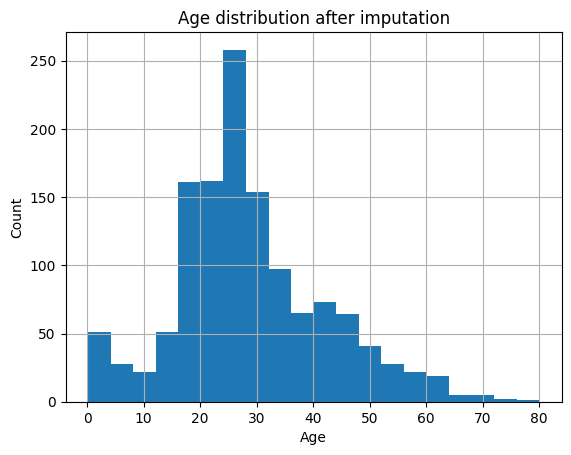

In [379]:
xls_df['Age'].hist(bins=20)
plt.title("Age distribution after imputation")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [380]:
# checking null values in train data
xls_df.isnull().sum()

Pclass         0
Survived       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       2
Title          0
Fare_bin       3
dtype: int64

Fixed NULL values issues for Ages and Fare. Time for Embarked

In [381]:
xls_df[xls_df['Embarked'].isnull()]
xls_df[xls_df['Ticket'] == '113572']
xls_df[xls_df['Fare'] == '80.0']

xls_df['Embarked'].mode()[0]

# visually checking in this pattern
# for all pclass = 1 and Fare range between 75 and 85 and had B started cabins and mostly its S(Southampton) also mode is S

xls_df['Embarked'].fillna(xls_df['Embarked'].mode()[0], inplace=True)

# checking null values in xls data
xls_df.isnull().sum()

Pclass         0
Survived       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
Title          0
Fare_bin       3
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

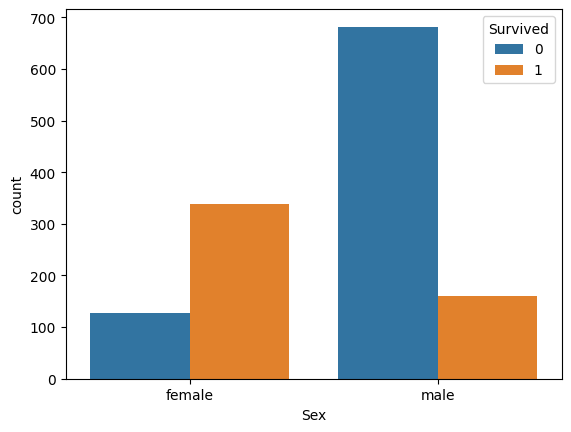

In [382]:
# plotting bar chart for Sex by Survived
sns.countplot(data=xls_df, x='Sex', hue='Survived')

This part is starting point for normalization of data, starting with Titles

In [383]:
# checking unique titles
xls_df['Title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [384]:
# this function used to refine titles and make them consistent
def refine_titles(row):
    title = row['Title']
    sex = row['Sex']
    age = row['Age']
    
    # convert sex text to numeric value
    if isinstance(sex, str):
        sex = 1 if sex.lower() == 'male' else 0

    # keep basic titles as they are
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title

    # map male related rare titles to mr
    if title in ['Don', 'Sir', 'Col', 'Major', 'Capt', 'Rev', 'Dr', 'Jonkheer']:
        if sex == 1:
            return 'Mr'
        else:
            return 'Mrs' if (pd.notnull(age) and age >= 25) else 'Miss'

    # map female noble titles based on age
    if title in ['Lady', 'Countess', 'Dona', 'Mme']:
        if pd.notnull(age):
            return 'Mrs' if age >= 25 else 'Miss'
        else:
            return 'Mrs'

    # convert french variants to miss
    if title in ['Mlle', 'Ms']:
        return 'Miss'

    # default to mr or mrs based on sex
    return 'Mr' if sex == 1 else 'Mrs'


In [385]:
# apply the refine_titles function to create a new refined Title column
xls_df['Title_refined'] = xls_df.apply(refine_titles, axis=1)

# train_df[['Title', 'Title_refined']]
xls_df['Title_refined'].unique()
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# train_df[['Name', 'Title']]

xls_df[xls_df['Title_refined'] == 'Master'].head()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin,Title_refined
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,Master,"(32.8, 263.0]",Master
54,1,1,"Carter, Master. William Thornton II",male,11.0000,1,2,113760,120.0000,B96 B98,S,Master,"(32.8, 263.0]",Master
94,1,1,"Dodge, Master. Washington",male,4.0000,0,2,33638,81.8583,A34,S,Master,"(32.8, 263.0]",Master
249,1,1,"Ryerson, Master. John Borie",male,13.0000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Master,"(84.347, 512.329]",Master
273,1,1,"Spedden, Master. Robert Douglas",male,6.0000,0,2,16966,134.5000,E34,C,Master,"(84.347, 512.329]",Master


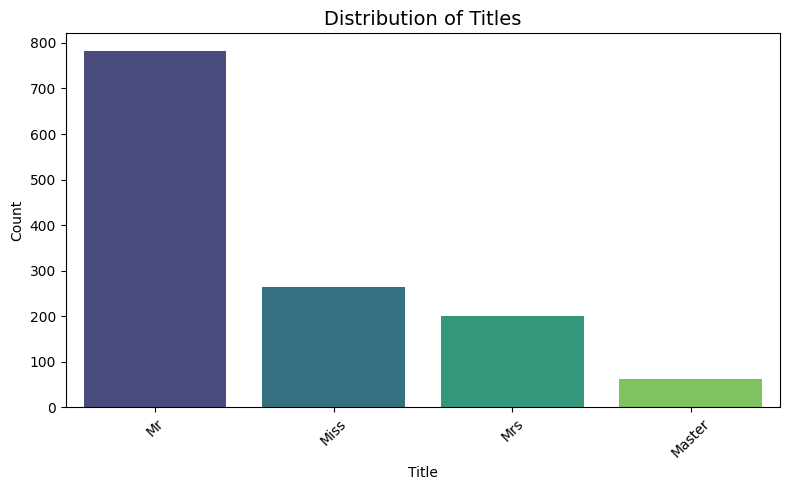

In [386]:
xls_df['Title'] = xls_df['Title_refined']
xls_df.drop(['Title_refined'], axis=1, inplace=True)
xls_df['Title'].unique()

plt.figure(figsize=(8,5))
sns.countplot(data=xls_df, x='Title', order=xls_df['Title'].value_counts().index, palette='viridis')

plt.title("Distribution of Titles", fontsize=14)
plt.xlabel("Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [387]:
# here i tried to understand why one family had high fare, but cound not find any specific reason
xls_df.sort_values(by=['Fare', 'Ticket', 'Cabin'], ascending=[False, True, True]).head(20)

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,"(84.347, 512.329]"
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,"(84.347, 512.329]"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs,"(84.347, 512.329]"
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,"(84.347, 512.329]"
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,"(32.8, 263.0]"
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,"(32.8, 263.0]"
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,"(32.8, 263.0]"
114,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,"(32.8, 263.0]"
115,1,0,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Mr,"(32.8, 263.0]"
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,Mrs,"(32.8, 263.0]"


In [388]:
# encode Sex
le = LabelEncoder()
xls_df['Sex'] = le.fit_transform(xls_df['Sex'])

# Encode Title preparation for modeling
title_le = LabelEncoder()
xls_df['Title'] = title_le.fit_transform(xls_df['Title'])

# Encode Embarked preparation for modeling
embarked_le = LabelEncoder()
xls_df['Embarked'] = embarked_le.fit_transform(xls_df['Embarked'])

This level I reached FE - Feature Engineering and started developing new Features such as Family Size, IsAlone, Age by PSG Class

In [389]:
# Family features
xls_df['FamilySize'] = xls_df['SibSp'] + xls_df['Parch'] + 1
xls_df['IsAlone'] = (xls_df['FamilySize'] == 1).astype(int)
# xls_df['Family_Sex'] = xls_df['FamilySize'] * xls_df['Sex']
xls_df['Age_Pclass'] = xls_df['Age'] * xls_df['Pclass']

xls_df.head()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin,FamilySize,IsAlone,Age_Pclass
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,2,1,"(32.8, 263.0]",1,1,29.0000
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,2,0,"(32.8, 263.0]",4,0,0.9167
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,2,1,"(32.8, 263.0]",4,0,2.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,2,2,"(32.8, 263.0]",4,0,30.0000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,2,3,"(32.8, 263.0]",4,0,25.0000


In [390]:
# Ticket frequency
xls_df['TicketFreq'] = xls_df.groupby('Ticket')['Ticket'].transform('count')

# Tried to derive some insights from Ticket frequency
xls_df[['Ticket', 'TicketFreq']].head()

# xls_df.head()
# xls_df.info()

,Ticket,TicketFreq
0,24160,4
1,113781,6
2,113781,6
3,113781,6
4,113781,6


Preparation of data for model - Removeing all unnecessary columns and later will scale data

In [391]:
# drop unnecessary columns
xls_df.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare_bin'], axis=1, inplace=True)
xls_df.head()

,Pclass,Survived,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age_Pclass,TicketFreq
0,1,1,0,29.0000,211.3375,2,1,1,1,29.0000,4
1,1,1,1,0.9167,151.5500,2,0,4,0,0.9167,6
2,1,0,0,2.0000,151.5500,2,1,4,0,2.0000,6
3,1,0,1,30.0000,151.5500,2,2,4,0,30.0000,6
4,1,0,0,25.0000,151.5500,2,3,4,0,25.0000,6


Data Modeling Part - splitting data to train and test and printing some summary about ready to go data and scaling data with Standard Scale

In [392]:
# assuming your target column is named 'Survived'
X = xls_df.drop('Survived', axis=1)
y = xls_df['Survived']

# split data 80/20 with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# data summary
print(f"rows: {X.shape[0]}, columns: {X.shape[1]}")
print(f"missing values: {X.isnull().sum().sum()}")
print(f"target distribution: {y.value_counts(normalize=True)}")

rows: 1309, columns: 10
missing values: 0
target distribution: Survived
0    0.618029
1    0.381971
Name: proportion, dtype: float64


In [393]:
# list of numeric features to scale
num_features = ['Age','Fare','FamilySize','Age_Pclass','TicketFreq']

# initialize scaler
scaler = StandardScaler()

# fit on train data only, then transform both
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [394]:
# preview train caled data
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age_Pclass,TicketFreq
999,3,0,-0.813277,-0.499194,1,1,-0.557940,1,-0.260281,-0.611804
392,2,0,-0.365332,-0.090569,0,3,0.083293,0,-0.456217,-0.043933
628,3,0,-1.335881,-0.017847,2,1,3.289456,0,-0.946057,2.795424
1165,3,1,-0.290674,-0.509936,0,2,-0.557940,1,0.425495,-0.611804
604,3,0,-0.962593,-0.501240,2,1,-0.557940,1,-0.456217,-0.611804


In [395]:
# preview test caled data
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age_Pclass,TicketFreq
1028,3,0,-0.813277,-0.163632,1,1,0.083293,0,-0.260281,0.523939
1121,3,1,-1.709169,-0.200292,0,0,0.724526,0,-1.435896,0.523939
1155,3,1,-0.216016,-0.498683,2,2,-0.557940,1,0.523463,-0.611804
1251,3,1,0.119943,-0.493056,2,2,-0.557940,1,0.964318,-0.611804
721,3,1,0.530560,-0.504396,2,2,-0.557940,1,1.503142,-0.611804


In [396]:
# decision tree(dt) and random forest(rf)
# dt tuning
dt = DecisionTreeClassifier(random_state=42)
params_dt = {
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(dt, params_dt, cv=5, scoring='accuracy')
grid_dt.fit(X, y)

print("Best Decision Tree parameters:", grid_dt.best_params_)
print("Best Decision Tree score (CV mean):", round(grid_dt.best_score_, 4))

best_dt = DecisionTreeClassifier(**grid_dt.best_params_, random_state=42)
best_dt.fit(X_train, y_train)

# rf tuning
rf = RandomForestClassifier(random_state=42)
params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9, 11],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X, y)

print("Best Random Forest parameters:", grid_rf.best_params_)
print("Best Random Forest score (CV mean):", round(grid_rf.best_score_, 4))

best_rf = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 10}
Best Decision Tree score (CV mean): 0.7089
Best Random Forest parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest score (CV mean): 0.7135


,n_estimators,300
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [397]:
# evaluation with cross-validation and hold-out test
models = {
    "Decision Tree": best_dt,
    "Random Forest": best_rf
}

results = []
for name, model in models.items():
    cv_acc = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    results.append({
        'Model': name,
        'CV Accuracy': round(cv_acc, 4),
        'Train Accuracy': round(train_acc, 3),
        'Test Accuracy': round(test_acc, 3)
    })

results_df = pd.DataFrame(results)
display(results_df)


,Model,CV Accuracy,Train Accuracy,Test Accuracy
0,Decision Tree,0.7089,0.848,0.821
1,Random Forest,0.7135,0.835,0.844


RF model performed slightly better than DT, achieving higher cross-validation and test accuracies.
While the DT showed minor overfitting with higher training score, RF demonstrated better generalization and stability.

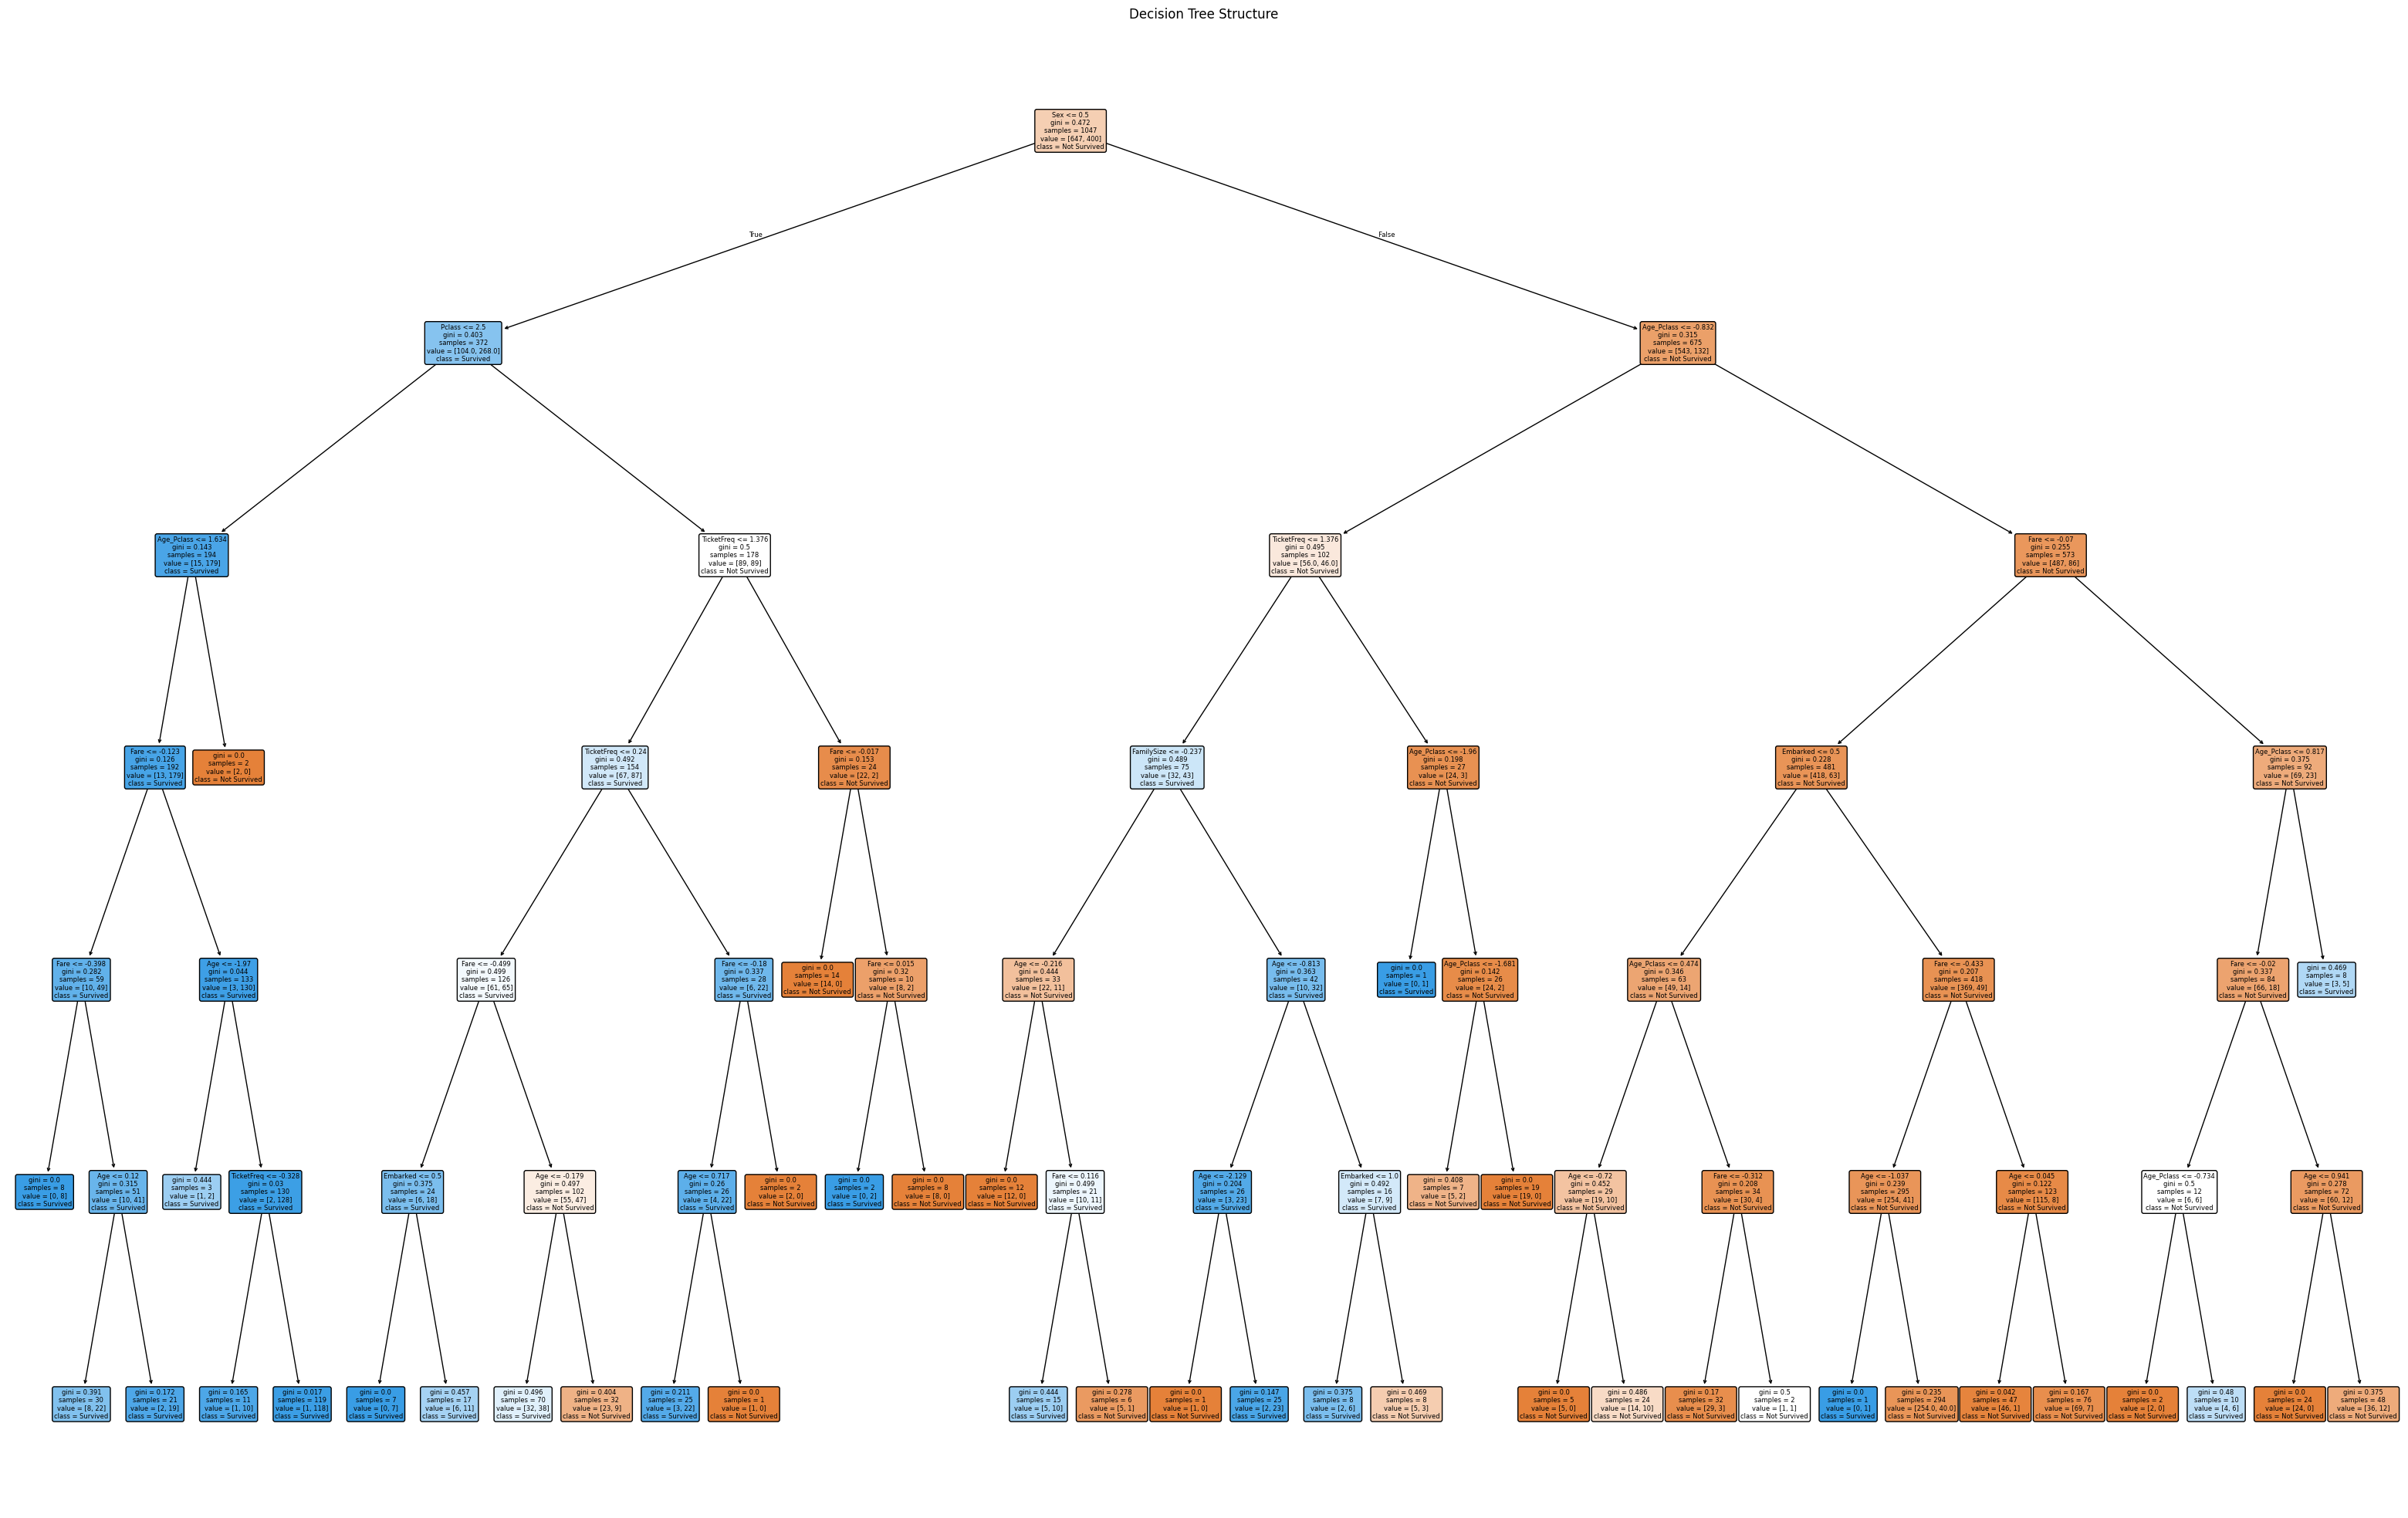

In [398]:
# DT Visualization
plt.figure(figsize=(40, 25))
plot_tree(best_dt, 
          filled=True,
          feature_names=X.columns,
          class_names=['Not Survived','Survived'],
          fontsize=6, 
          rounded=True,
          proportion=False           
)
plt.title("Decision Tree Structure")
plt.show()


From this DT, I understood the model mainly splits by Sex and Pclass, which means gender and passenger class play the biggest role in predicting survival.
Female passengers and people from higher classes usually survived more often, while most males from lower classes did not.
Age, Fare, and Title also affected the predictions, giving a more detailed view of different passenger groups.

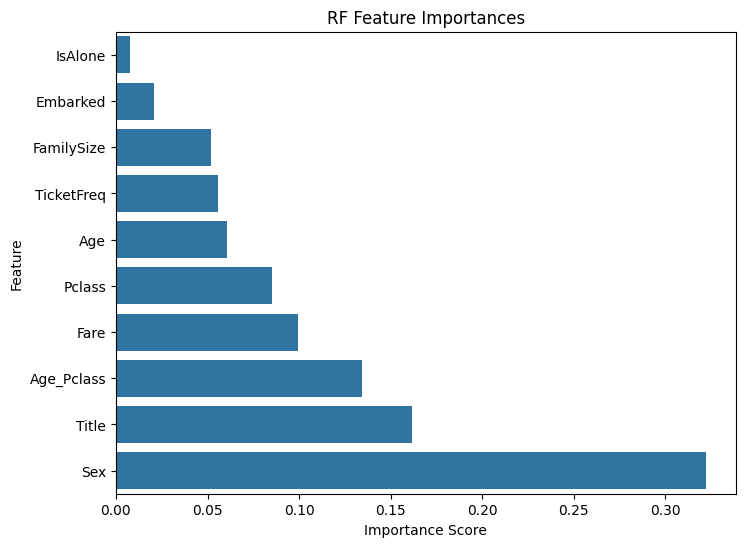

In [399]:
# Feature importances from RF
feat_imp = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("RF Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


From this feature importance chart, I found that Sex is the most influential factor for predicting survival, followed by Title, Age_Pclass, and Fare.
These features reflect strong relationships between gender, social status, ticket price, and class with the chance of survival.
Other variables such as Pclass, Age, TicketFreq, and FamilySize have moderate impact, while Embarked and IsAlone play only minor roles in the model’s decisions.

RF-Classification Report:
              precision    recall  f1-score   support

Not Survived      0.854     0.901     0.877       162
    Survived      0.824     0.750     0.785       100

    accuracy                          0.844       262
   macro avg      0.839     0.826     0.831       262
weighted avg      0.842     0.844     0.842       262



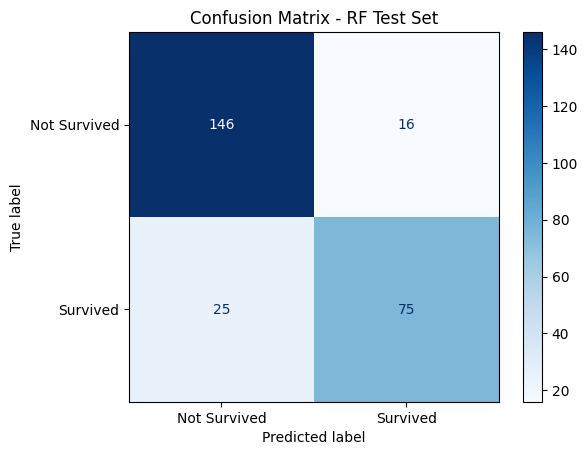

In [400]:
# Classification report and confusion matrix for RF
# predictions
y_pred = best_rf.predict(X_test)

# classification report
print("RF-Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'], digits=3))

# confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - RF Test Set")
plt.show()

From results I see RF performed strong, reaching about 84% accuracy on test data.
Model predicted most not survived are, around 90%, and survivors about 75%.
Precision values close for both groups, showing balance between predicting yes or no cases.
Few survivors missed, meaning model still generalizes well but could improve recall little more.

Final Summary:
At last I compared DT and RF for predicting Titanic survival and after creating new features like Title, FamilySize, IsAlone, and Age_Pclass, both models gave close CV accuracy near 71%.
RF showed better performance with test accuracy around 84%, giving more stable and balanced results.
Most important features were Sex, Title, and Age_Pclass, meaning gender, social status, and age class relation had biggest influence on survival.
Overall, RF captured main survival pattern females and people from higher classes survived more while others had lower chance.